<a href="https://colab.research.google.com/github/geomyll33/Beautez/blob/master/ProPhet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source:https://aadhil-imam.medium.com/facebooks-prophet-model-for-time-series-forecasting-5b27ecf100ef

# **Facebook’s Prophet Model for Time Series Forecasting**

Prophet for forecasting
Prophet is open source software released by Facebook’s Core Data Science team.Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have **strong seasonal effects and several seasons of historical data**. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.


In [ ]:
!pip install fbprophet

In [ ]:
import pandas as pd 
from fbprophet import Prophet

df = pd.read_csv('/content/527085_ΟΗ_Μ.csv')
df.head()

,timestamp,provision_id,meter_id,indication,0,1,2,3
0,15-01-01,527085,A92Z64097,395,0,1,0,1
1,15-02-01,527085,A92Z64097,395,0,1,0,1
2,15-03-01,527085,A92Z64097,395,0,1,0,1
3,15-04-01,527085,A92Z64097,396,0,1,0,1
4,15-05-01,527085,A92Z64097,396,0,1,0,1


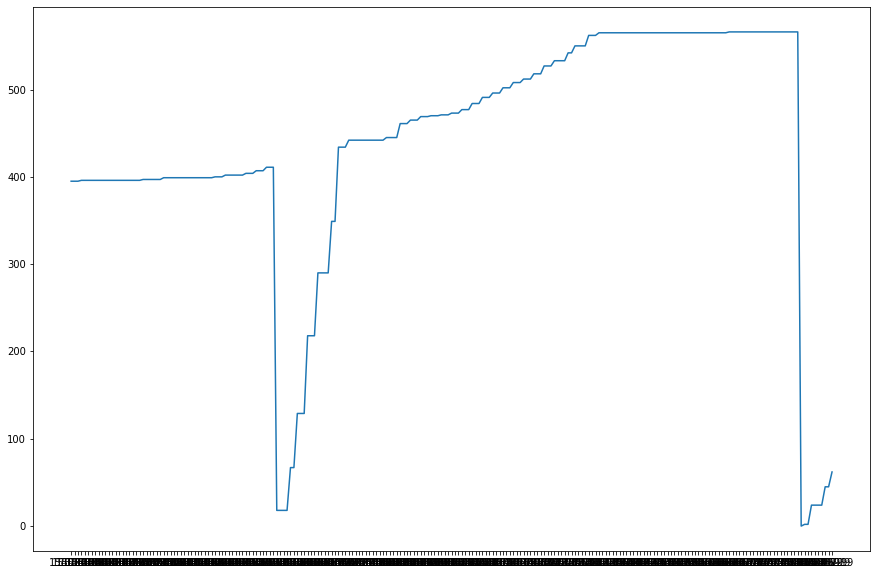

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df['timestamp'],df['indication'])

In [ ]:
df=df.drop(columns=['provision_id','meter_id','0','1','2','3'])


In [ ]:
df = df.rename(columns = {'timestamp': 'ds', 'indication': 'y'}, inplace = False)


# Check TimeSeries **Stationarity**

We can check stationarity using the following methods:

Summary Statistics: You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.
Plotting Rolling Statistics: We have a window lets say window size is 12 and then we find rolling mean and variance to check stationary.
Dickey-Fuller Test: The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the test statistic is less than the critical value, we can say that time series is stationary.
KPSS Test: it is another test for checking the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.
Autocorrelation (ACF) and partial autocorrelation (PACF) plots: these are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.<<https://www.kaggle.com/giobbu/stationary-time-series>>

In [ ]:
!pip install --upgrade --no-deps statsmodels

     |████████████████████████████████| 9.5MB 6.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from matplotlib import pyplot
import statsmodels.api
# adfuller library 
from statsmodels.tsa.stattools import adfuller
#  kpss library
from statsmodels.tsa.stattools import kpss

def summary_statistics(series):
    X = series.values
    split = round(len(X) / 2)
    X1, X2 = X[0:split], X[split:]
    mean1, mean2 = X1.mean(), X2.mean()
    var1, var2 = X1.var(), X2.var()
    print('Summary Statistics')
    print('mean1=%f, mean2=%f' % (mean1, mean2))
    print('variance1=%f, variance2=%f' % (var1, var2))
    print('')


# check_adfuller
def check_adfuller(series):
    # Dickey-Fuller test
    print ('Results of adfuller Test:')
    result = adfuller(series, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
    print('')
    

#define KPSS
def check_kpss(series):
    print ('Results of KPSS Test:')
    result = kpss(series, regression='c', nlags='auto')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[3])
    print('')


# check_mean_std
def check_mean_std(series):
    #Rolling statistics
    TS = series
    TS['rollmean'] = TS.y.rolling(12).mean()
    TS['rollstd'] = TS.y.rolling(12).std()

    # Create traces
    fig = go.Figure()
    fig.add_trace(go.Scatter(x = TS['datetime'], y=TS['y'], name='Original'))
    fig.add_trace(go.Scatter(x = TS['datetime'], y=TS['rollmean'], name='Rollling Mean'))
    fig.add_trace(go.Scatter(x = TS['datetime'], y=TS['rollstd'], name='Rolling Std'))
    fig.update_layout(title='Check Stationarity with Rolling Mean and Rolling Std ',xaxis_title='Datetime')
    fig.show()
    TS.drop(['rollmean','rollstd'],axis=1,inplace=True)

# Examine the patterns of ACF and PACF (along with the time series plot and histogram)

def tsplot(ts, lags=None, title='', figsize=(14, 8)):
    '''Examine the patterns of ACF and PACF, along with the time series plot and histogram.
    '''
    y = ts.y
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax   = plt.subplot2grid(layout, (0, 0))
    hist_ax = plt.subplot2grid(layout, (0, 1))
    acf_ax  = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax, kind='hist', bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    fig.tight_layout()
    
    summary_statistics(y)
    check_adfuller(y)
    check_kpss(y)
    check_mean_std(ts)
    
    return ts_ax, acf_ax, pacf_ax

NameError: ignored

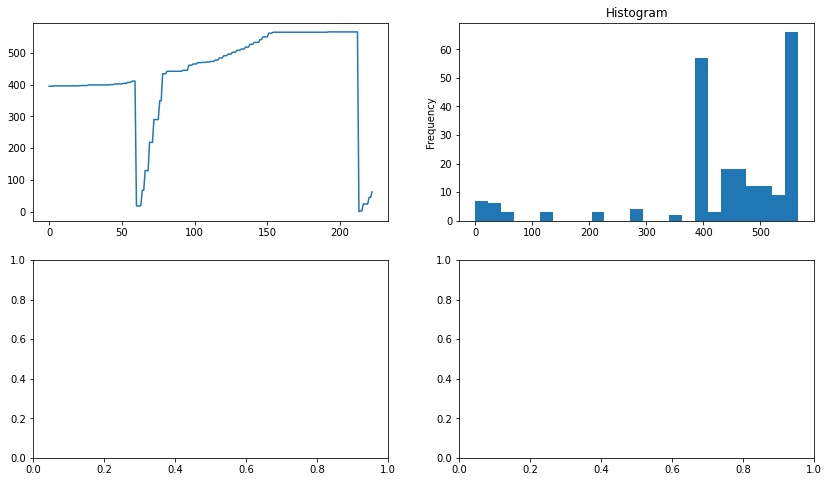

In [ ]:
tsplot(df)

New lets fit time series data to the model.We start by creating an instance of the Prophet class and then fit it to our dataset , you can see the code below.

**Differencing**

NameError: ignored

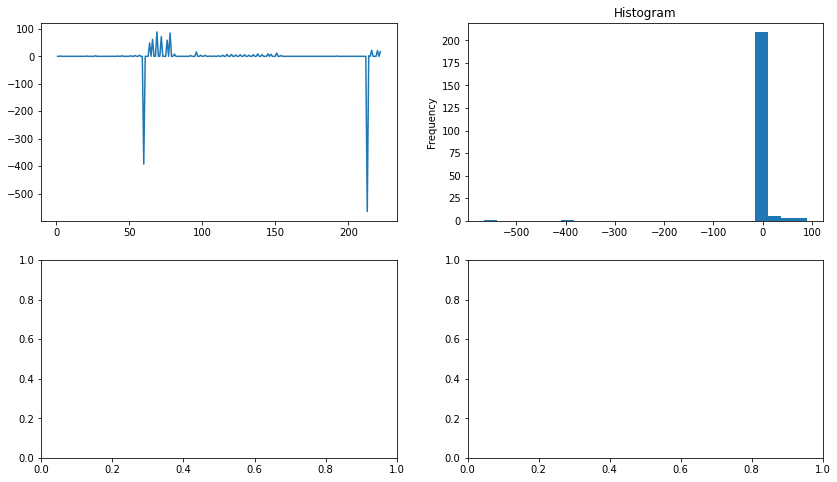

In [ ]:
df.y = df.y.diff()
df.dropna(inplace=True)
# visualization
tsplot(df)

**Seasonal Differencing**

NameError: ignored

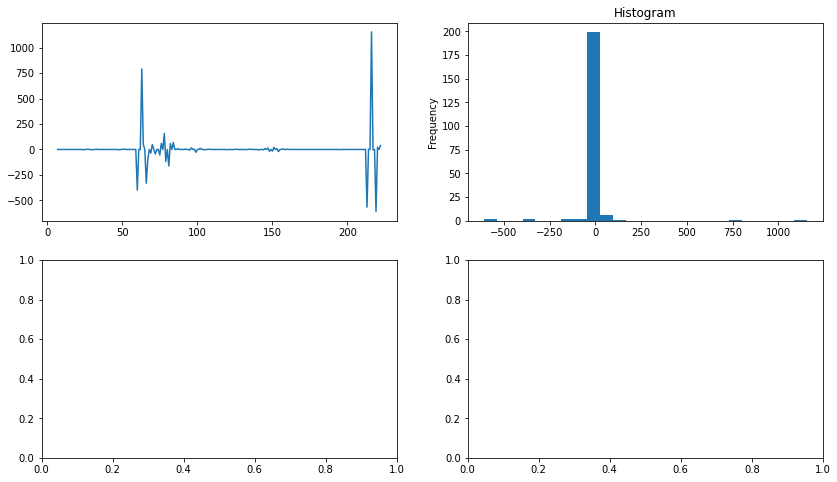

In [ ]:
# Seasonal differencing
df.y =  df.y.diff(3)
df.dropna(inplace=True)
# visualization
tsplot(df)

In [ ]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


The next step is to prepare our model to make future predictions. This is achieved using the Prophet.make_future_dataframe method and passing the number of days to predict in the future. We use the periods attribute to specify this.

In [ ]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
576,2020-07-10
577,2020-07-11
578,2020-07-12
579,2020-07-13
580,2020-07-14


In the code chunk above, we instructed Prophet to generate 365 datestamps in the future.
after that use the predict method to make future predictions. This will generate a dataframe with a yhat column that will contain the predictions.Prophet returns a large DataFrame with many interesting columns, but we subset our output to the columns most relevant to forecasting.

In [ ]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-08-15,-2.548863,-162.615278,131.098311,-2.548863,-2.548863,-10.454468,-10.454468,-10.454468,-10.454468,-10.454468,-10.454468,0.0,0.0,0.0,-13.003332
1,2001-09-15,-2.527579,-142.226430,150.267172,-2.527579,-2.527579,0.467572,0.467572,0.467572,0.467572,0.467572,0.467572,0.0,0.0,0.0,-2.060007
2,2001-10-15,-2.506982,-183.963769,107.343718,-2.506982,-2.506982,-41.569323,-41.569323,-41.569323,-41.569323,-41.569323,-41.569323,0.0,0.0,0.0,-44.076305
3,2001-11-15,-2.485698,-143.176006,149.918999,-2.485698,-2.485698,4.637104,4.637104,4.637104,4.637104,4.637104,4.637104,0.0,0.0,0.0,2.151407
4,2001-12-15,-2.465100,-151.278513,134.258372,-2.465100,-2.465100,-0.595150,-0.595150,-0.595150,-0.595150,-0.595150,-0.595150,0.0,0.0,0.0,-3.060250


How ever we need ds, yhat, yhat_lower and yhat_upper. yhat is our predicted forecast, yhat_lower is the lower bound for our predictions and yhat_upper is the upper bound for our predictions.
ds : the datestamp of the forecasted value
yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
yhat_lower : the lower bound of our forecasts
yhat_upper : the upper bound of our forecasts

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2001-08-15,-13.003332,-162.615278,131.098311
1,2001-09-15,-2.060007,-142.226430,150.267172
2,2001-10-15,-44.076305,-183.963769,107.343718
3,2001-11-15,2.151407,-143.176006,149.918999
4,2001-12-15,-3.060250,-151.278513,134.258372


Now lets plot the time series forecast, Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using mode.plot() and passing in our forecasts as the argument.

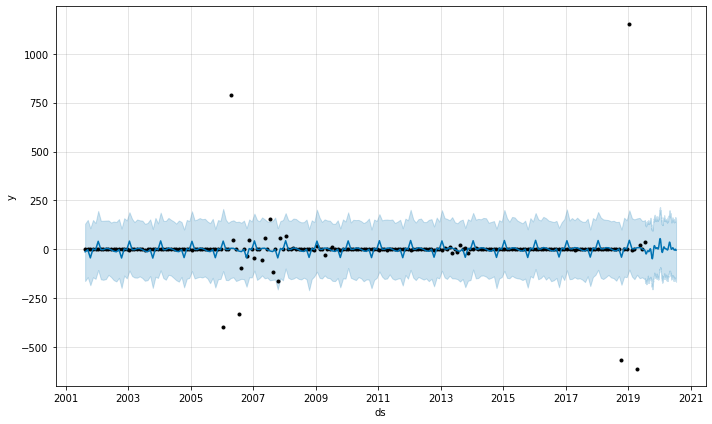

In [ ]:
plot1 = model.plot(forecast)

As above picture you can see Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).
Finally prophet has strong feature ability to return the components of our forecasts using plot_components method. Its plots the trend, yearly and weekly seasonality of the time series data.

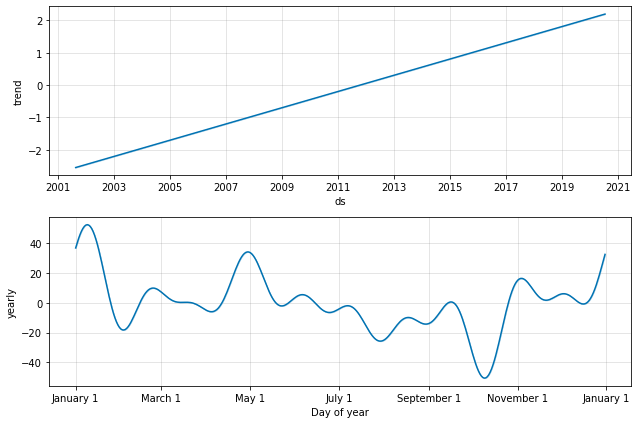

In [ ]:
plot2 = model.plot_components(forecast)